In [1]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
import os
from matplotlib import pyplot as plt
import tensorflow.keras.backend as K 
from tensorflow.keras.preprocessing import image
from tensorflow.math import log , reduce_mean


# def categorical_crossentropy_with_mask(y_true, y_pred):
#     y_true = y_true[:,:,:,1:]
#     loss_matrix = y_true * -log(y_pred)
#     loss = reduce_mean(loss_matrix, axis=(1,2,3)) + 0.001
#     return loss

# def jaccard_index(y_true, y_pred):
#     y_true = y_true[:,:,:,1:]
#     y_true_f = K.flatten(y_true)
#     y_pred_f = K.flatten(y_pred)
#     intersection = K.sum(y_true_f * y_pred_f)
#     return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

# model = load_model("infastate_segm_model.h5",custom_objects = {'dice_loss_plus_1focal_loss': categorical_crossentropy_with_mask, 'jaccard_coef':jaccard_index})
model = load_model("infastate_segm_model_100_epochs.h5")



1/1 [==============================] - 1s 576ms/step


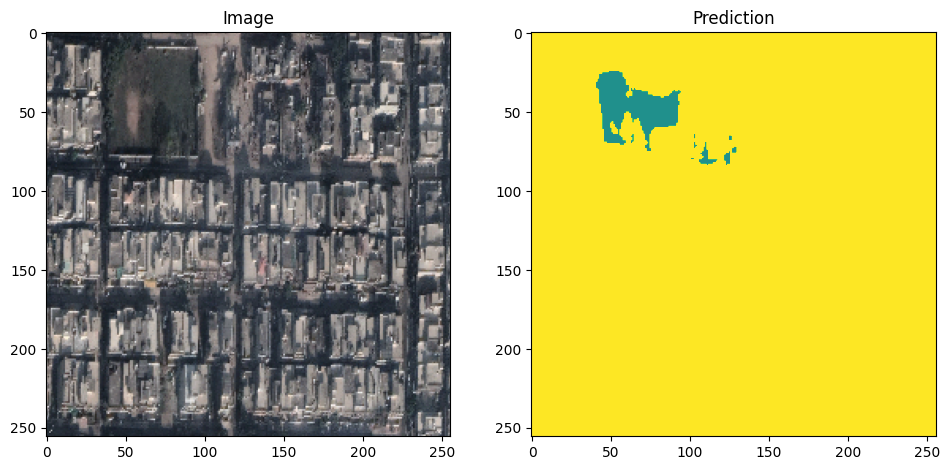

1/1 [==============================] - 0s 147ms/step


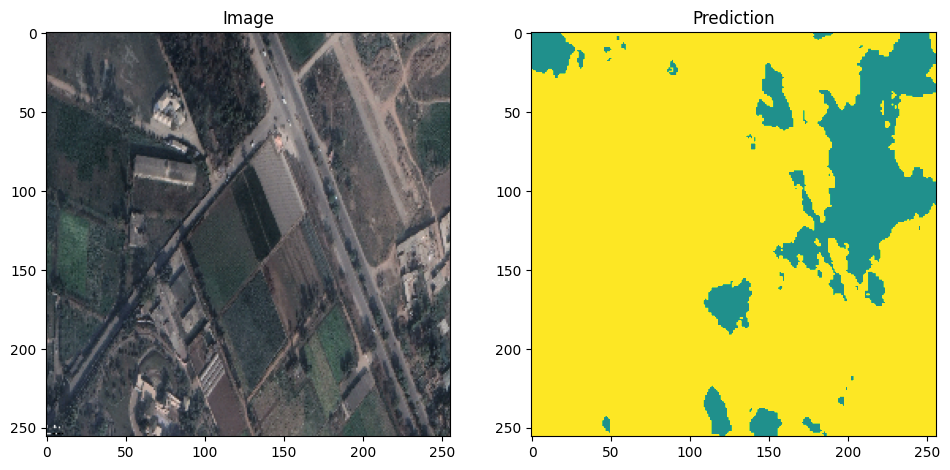

1/1 [==============================] - 0s 155ms/step


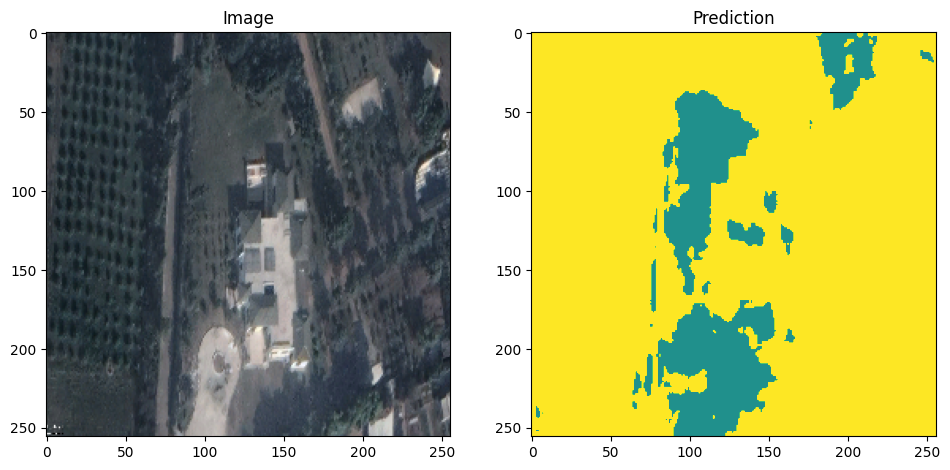

1/1 [==============================] - 0s 160ms/step


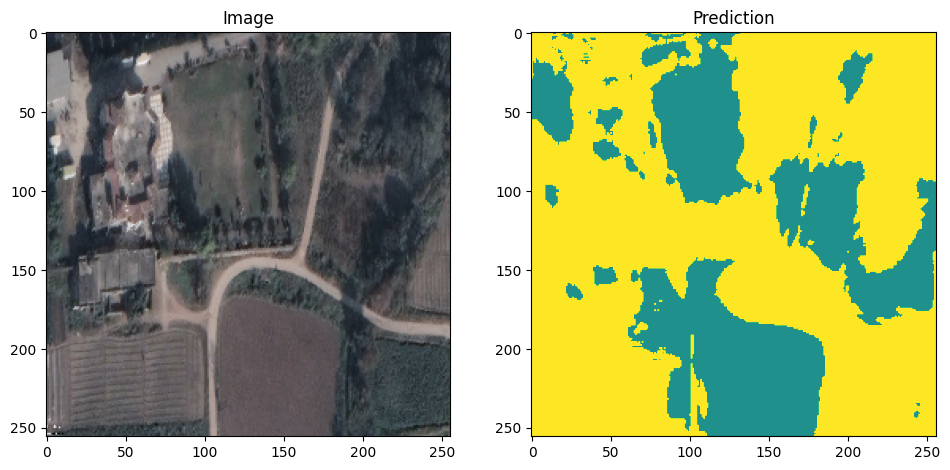

1/1 [==============================] - 0s 160ms/step


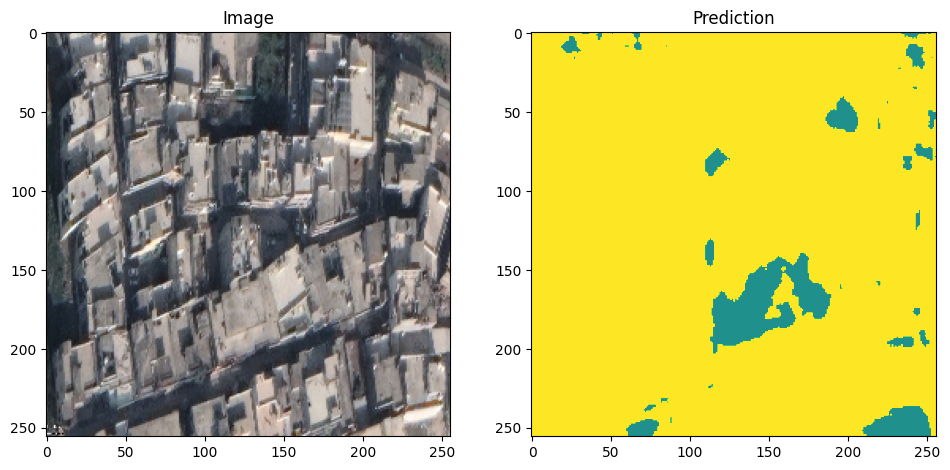

1/1 [==============================] - 0s 159ms/step


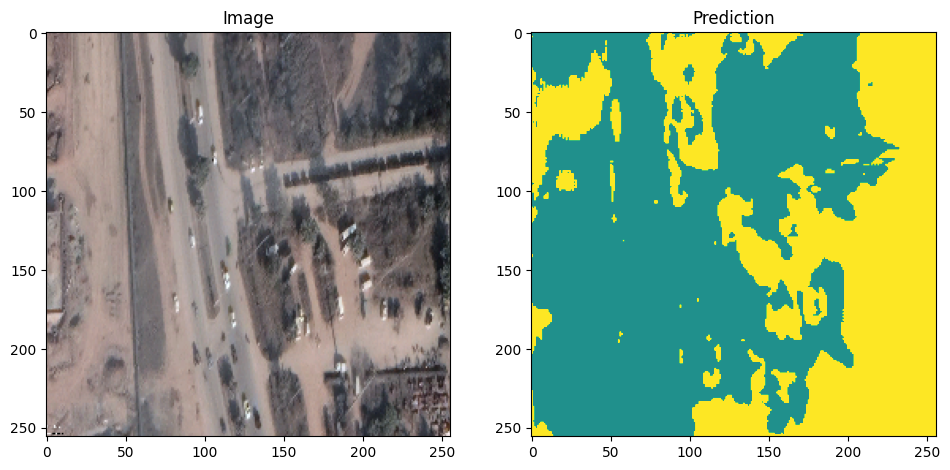

1/1 [==============================] - 0s 151ms/step


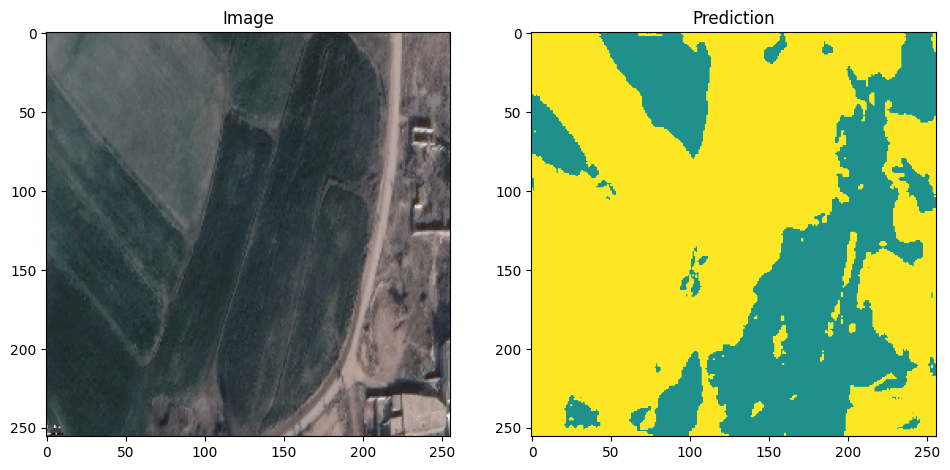

In [2]:
# Load and preprocess the unseen image
for i in os.listdir("Testing Data"):
    img_path = os.path.join("Testing Data", i)
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    vmin = 0
    vmax = 2

    predictions = model.predict(img_array)


    plt.figure(figsize=(24, 6))

    plt.subplot(141)
    plt.title('Image')
    plt.imshow(img)


    plt.subplot(142)
    plt.title('Prediction')
    prediction = model.predict(np.expand_dims(img , 0))[0].argmax(axis=2)  # convert to 0-5 classes
    plt.imshow(prediction, vmin = vmin, vmax = vmax)

    plt.show()


In [3]:
# Perform inference
predictions = model.predict(img_array)
# Apply softmax to obtain class probabilities
probs = np.argmax(predictions, axis=2)
# Get the predicted class labels by finding the class index with maximum probability
predicted_labels = np.argmax(probs, axis=2)
print(predicted_labels)

1/1 [==============================] - 0s 225ms/step
[[5 1 2 1 1 5 5 5 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  3 3 3 3 3 3 3 1 1 1 1 1 5 5 5 5 1 2 1 2 2 2 1 1 5 1 2 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1
  1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 5 5 5 5 1 1 5 1 1 1 1
  1 1 1 1]]


1/1 [==============================] - 0s 149ms/step


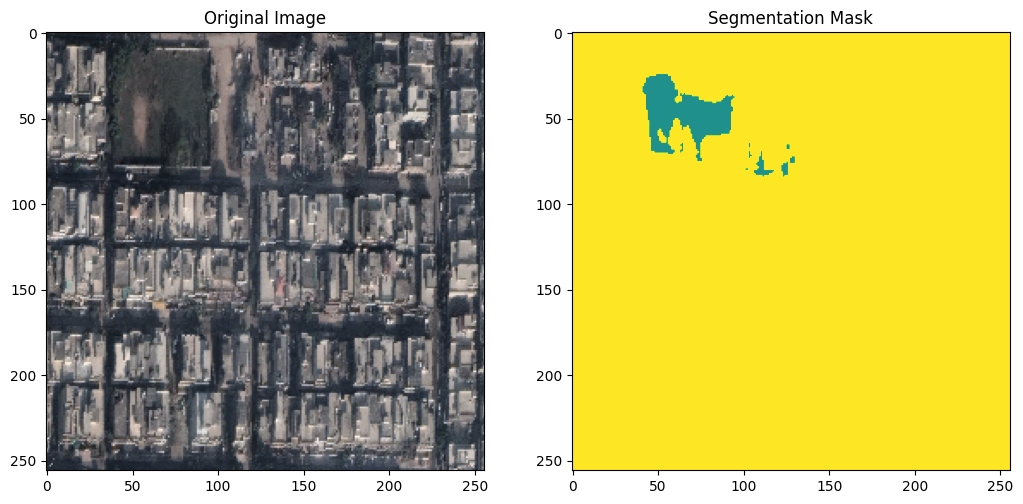

1/1 [==============================] - 0s 150ms/step


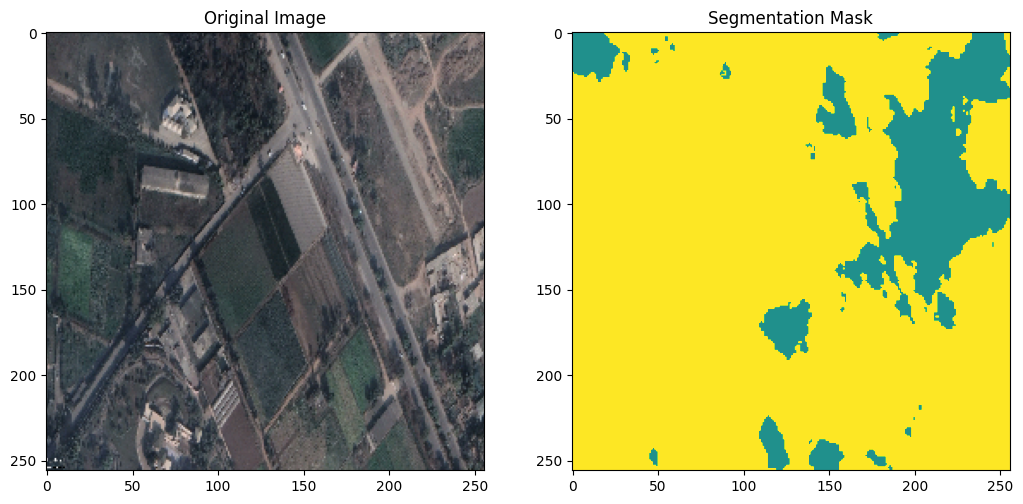

1/1 [==============================] - 0s 151ms/step


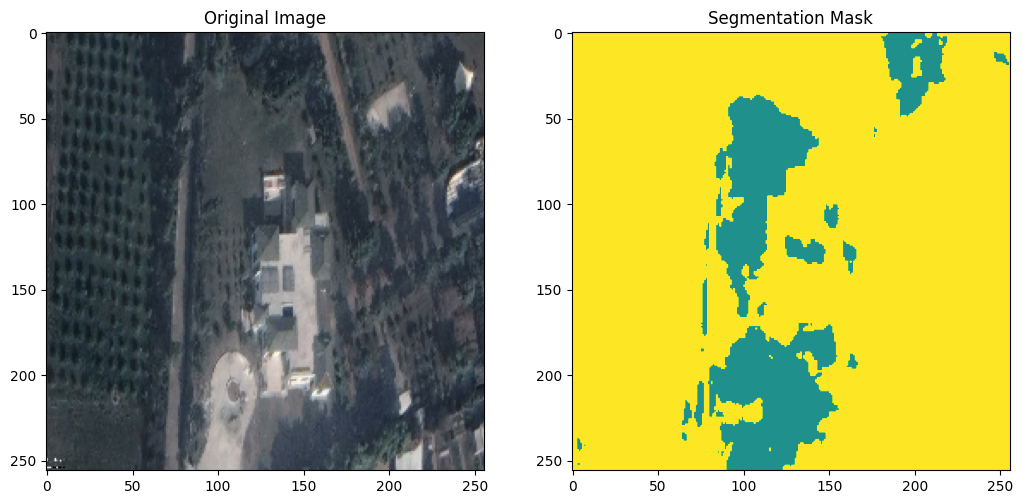

1/1 [==============================] - 0s 148ms/step


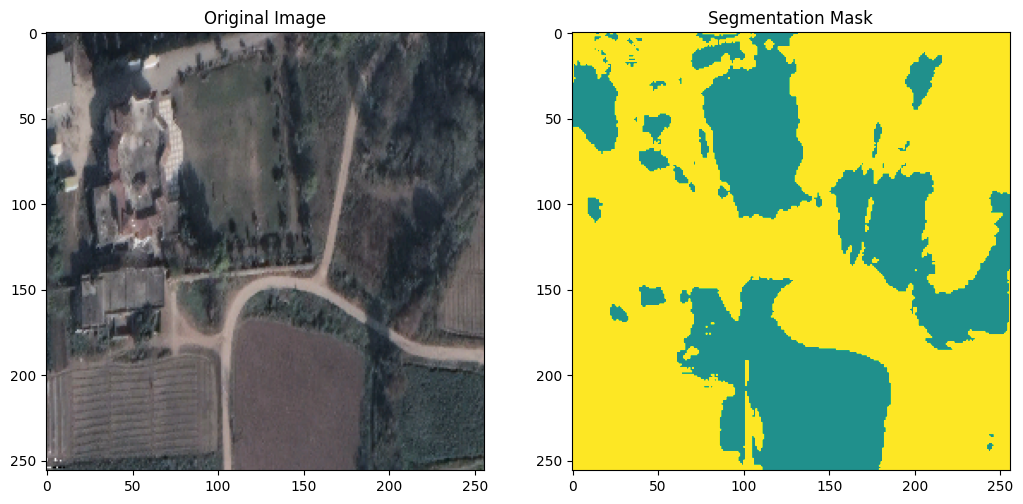

1/1 [==============================] - 0s 150ms/step


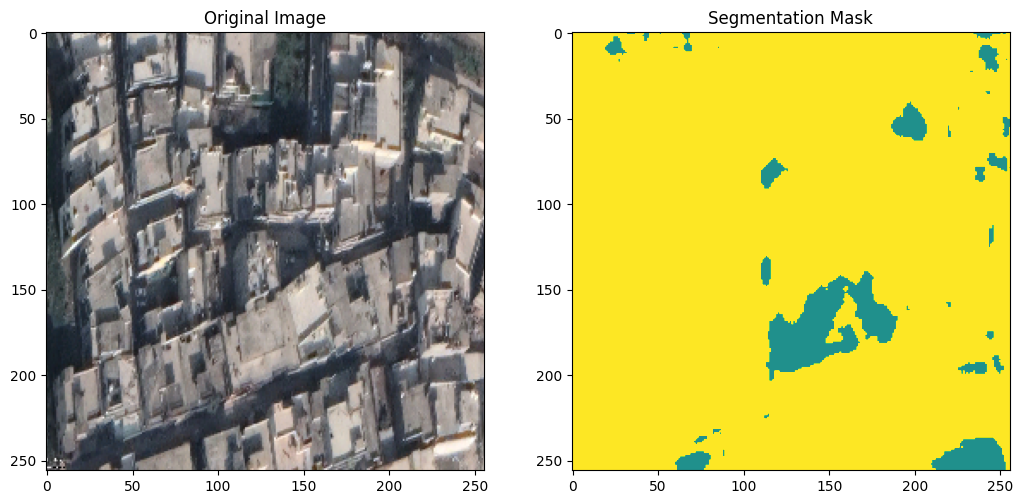

1/1 [==============================] - 0s 142ms/step


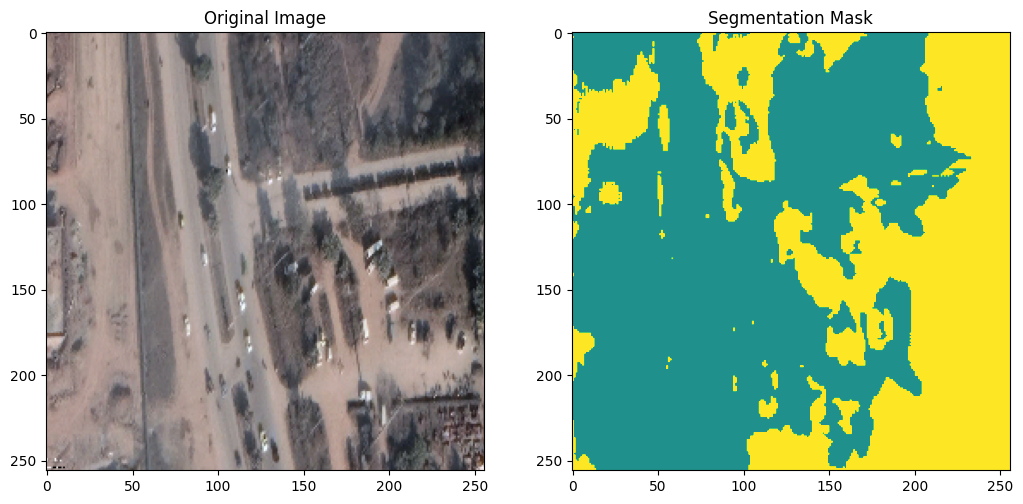

1/1 [==============================] - 0s 144ms/step


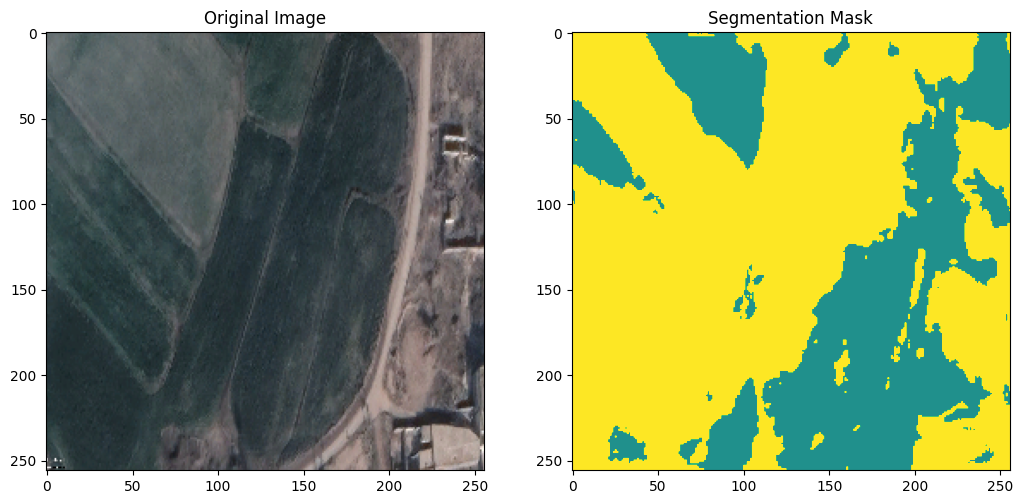

In [4]:


for i in os.listdir("Testing Data"):
    img_path = os.path.join("Testing Data", i)
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    vmin = 0
    vmax = 2

    predictions = model.predict(img_array)

    # Plot the original image and the segmentation mask
    plt.figure(figsize=(26, 16))
    plt.subplot(141)
    plt.imshow(img)
    plt.title("Original Image")

    plt.subplot(142)
    plt.imshow(predictions[0].argmax(axis=2), vmin = vmin, vmax = vmax)
    plt.savefig(i)
    plt.title("Segmentation Mask")
    plt.show()
